In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq

from scipy.optimize import nnls

In [2]:
def gaussian(x, center, width):
    return np.exp(-(((x-center)**2)/(2*width**2)))

def avg_resid(observed, expected):
    return(np.sum(np.abs(observed - expected))/expected.size)

In [4]:
noise_lvl = 0.05

# Testing lstsq with simple polynomials

Set up arrays:

In [5]:
x = np.arange(100)

y0 = np.ones_like(x)
y1 = x
y2 = x**2
y3 = x**3

all_ys = np.vstack((y3, y2, y1, y0)).T
all_ys.shape

(100, 4)

#### Create simulated data:

In [6]:
a_coeff = np.random.randint(1, high=10, size = 4) #actual coefficients
# a_coeff.shape

In [7]:
sim_data = all_ys @ a_coeff

#normalize
a_coeff = a_coeff/np.abs(sim_data).max()
sim_data = all_ys @ a_coeff

sim_data = np.reshape(sim_data, (sim_data.shape[0],1))

# plt.plot(sim_data)
sim_data.shape #should be 100
a_coeff

array([9.53463360e-07, 7.62770688e-06, 9.53463360e-07, 1.90692672e-06])

#### Testing first without noise:

In [8]:
found_coeff, residual, *trash = lstsq(all_ys, sim_data, rcond=None)

found_coeff

array([[9.53463360e-07],
       [7.62770688e-06],
       [9.53463360e-07],
       [1.90692672e-06]])

In [9]:
residual[0]

4.643804180304368e-31

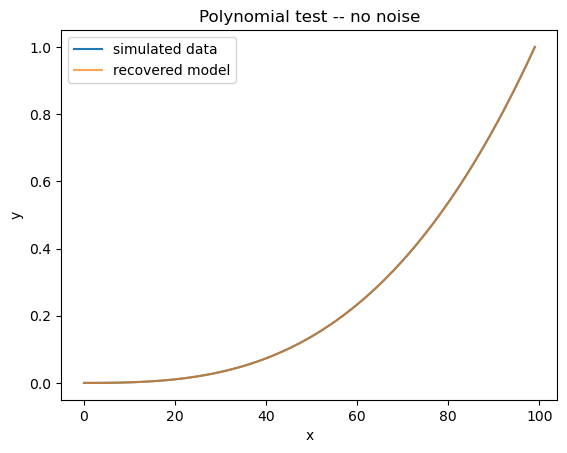

In [10]:
recovered_data = all_ys @ found_coeff

plt.plot(sim_data, label = 'simulated data')
plt.plot(np.reshape(recovered_data, (100)), label = 'recovered model', alpha = .7)
plt.title('Polynomial test -- no noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

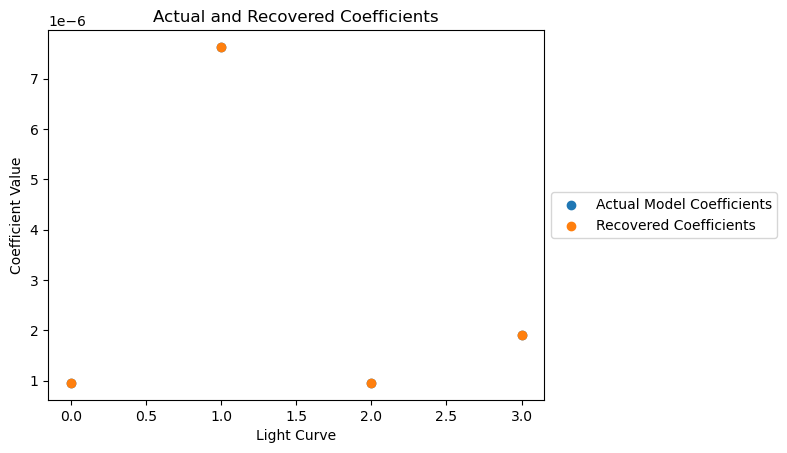

In [11]:
plt.scatter(np.arange(a_coeff.size), a_coeff, label = 'Actual Model Coefficients')
plt.scatter(np.arange(a_coeff.size), found_coeff, label = 'Recovered Coefficients')

plt.title('Actual and Recovered Coefficients')
plt.xlabel('Light Curve')
plt.ylabel('Coefficient Value')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

#### Testing with added noise:

In [12]:
noise = np.random.normal(scale=noise_lvl, size = sim_data.size)

noisy_sim_data = np.add(sim_data, np.reshape(noise, (100,1)))
noisy_sim_data.shape

(100, 1)

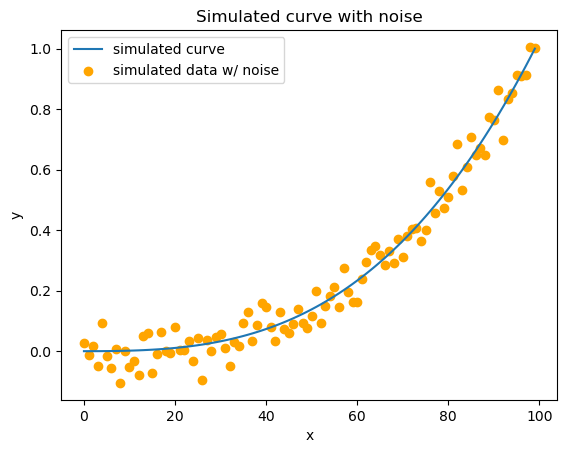

In [13]:
plt.plot(sim_data, label = 'simulated curve')
plt.scatter(x, noisy_sim_data, color = 'orange', label = 'simulated data w/ noise')
plt.title('Simulated curve with noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [14]:
found_coeff, residual, *trash = lstsq(all_ys, noisy_sim_data, rcond=None)

found_coeff

array([[ 9.34810267e-07],
       [ 9.10741748e-06],
       [ 1.39195948e-04],
       [-1.01533497e-02]])

In [15]:
residual[0]

0.22653498697220312

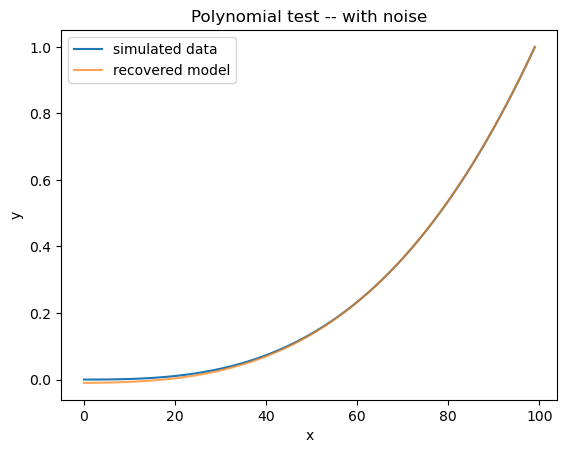

In [16]:
recovered_data = all_ys @ found_coeff

plt.plot(sim_data, label = 'simulated data')
plt.plot(np.reshape(recovered_data, (100)), label = 'recovered model', alpha = .7)
plt.title('Polynomial test -- with noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

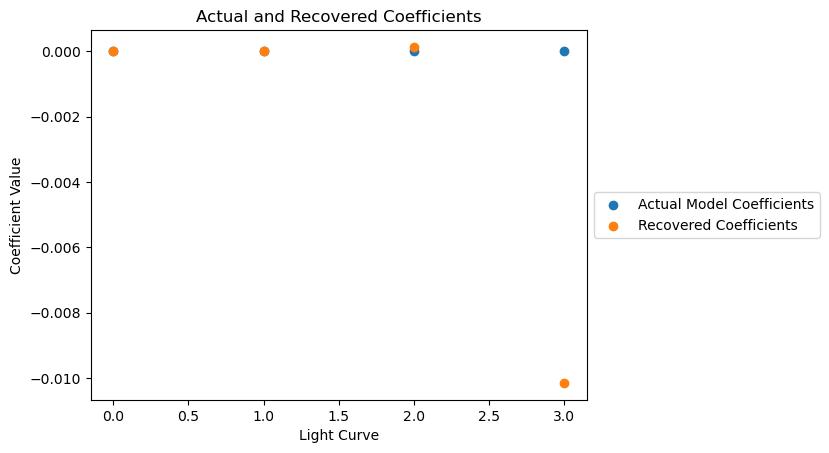

In [17]:
plt.scatter(np.arange(a_coeff.size), a_coeff, label = 'Actual Model Coefficients')
plt.scatter(np.arange(a_coeff.size), found_coeff, label = 'Recovered Coefficients')

plt.title('Actual and Recovered Coefficients')
plt.xlabel('Light Curve')
plt.ylabel('Coefficient Value')

# plt.ylim(-noise_lvl, noise_lvl)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [18]:
avg_resid(found_coeff, a_coeff)

0.010300718235300828

# Testing with modelled lightcurves

## Read in data:

In [71]:
readfile = 'lc_data_extended.npz'

data = np.load(readfile)
sub_lcs = data['lcs']
data.close()

maxes = np.amax(sub_lcs, axis=0)
sub_lcs = ((sub_lcs/maxes[None,:])* -1) +1

sub_lcs.min()
# np.count_nonzero(sub_lcs == sub_lcs.min())
# sub_lcs.shape

0.0

## Test 1:

#### Creating fake coefficients

3 gaussians centered at model 25, model 50, and model 75

In [20]:
width = 5
model_nums = np.arange(100)

a_coeff = np.zeros_like(model_nums)
a_coeff = a_coeff + gaussian(model_nums, 25, width) + gaussian(model_nums, 50, width) + gaussian(model_nums, 75, width)
a_coeff = a_coeff/(a_coeff.max())


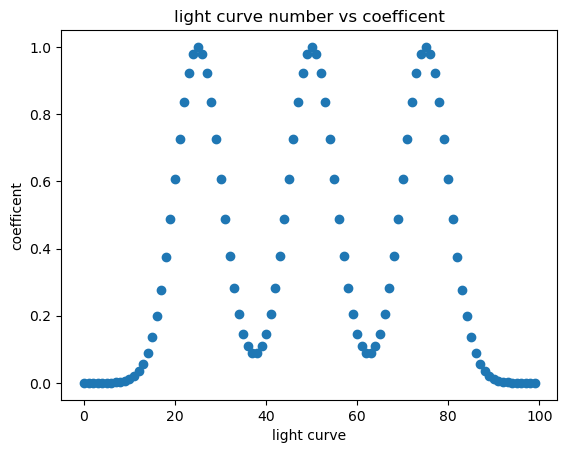

In [21]:
plt.scatter(model_nums, a_coeff)
plt.title('light curve number vs coefficent')
plt.xlabel('light curve')
plt.ylabel('coefficent');

#### Creating simulated data

In [22]:
sim_data = sub_lcs @ a_coeff

# normalize
a_coeff = a_coeff/np.abs(sim_data).max()
sim_data = sub_lcs @ a_coeff

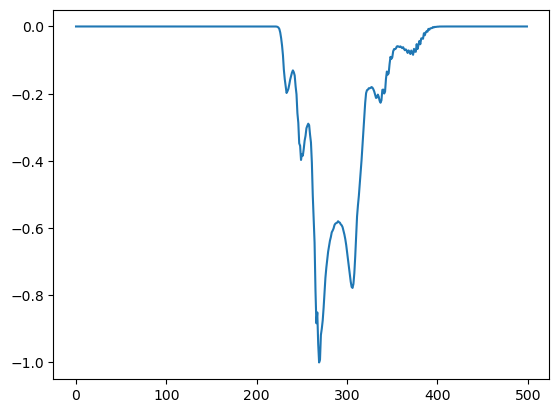

In [23]:
plt.plot(sim_data)

### Start without noise

In [24]:
found_coeff, residual, *trash = lstsq(sub_lcs, sim_data, rcond=0)

found_coeff.shape

(100,)

In [25]:
residual[0]

1.1289351707146783e-30

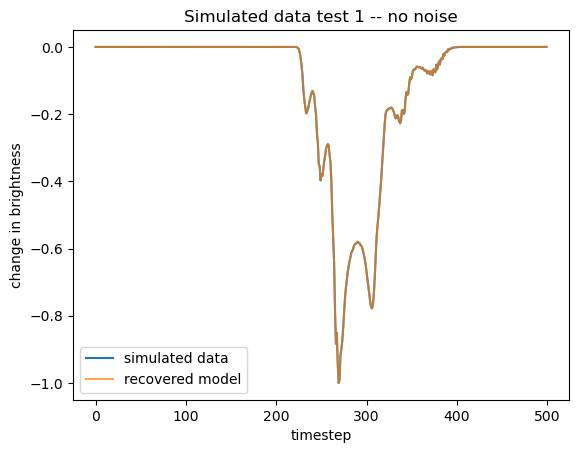

In [26]:
recovered_data = sub_lcs @ found_coeff

plt.plot(sim_data, label = 'simulated data')
plt.plot(np.reshape(recovered_data, (500)), label = 'recovered model', alpha = .7)
plt.title('Simulated data test 1 -- no noise')
plt.xlabel('timestep')
plt.ylabel('change in brightness')
plt.legend();

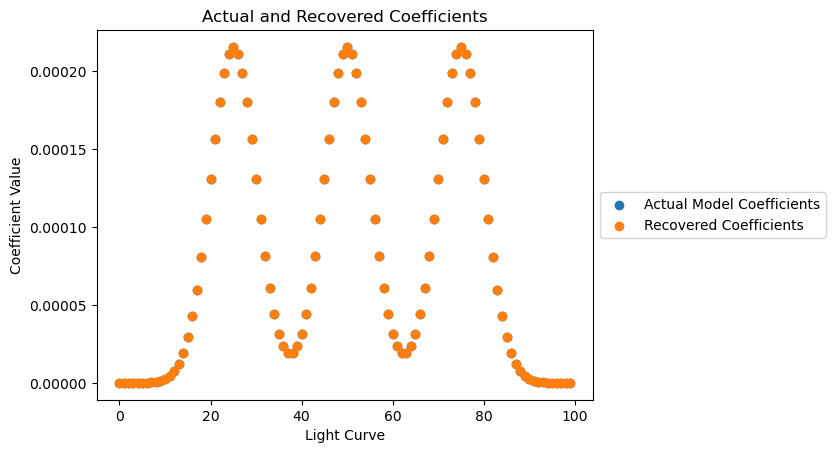

In [27]:
plt.scatter(model_nums, a_coeff, label = 'Actual Model Coefficients')
plt.scatter(model_nums, found_coeff, label = 'Recovered Coefficients')

plt.title('Actual and Recovered Coefficients')
plt.xlabel('Light Curve')
plt.ylabel('Coefficient Value')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

#### Add noise

In [28]:
noise = np.random.normal(scale=noise_lvl, size = sim_data.size)

noisy_sim_data = np.add(sim_data, noise)
noisy_sim_data.shape

(500,)

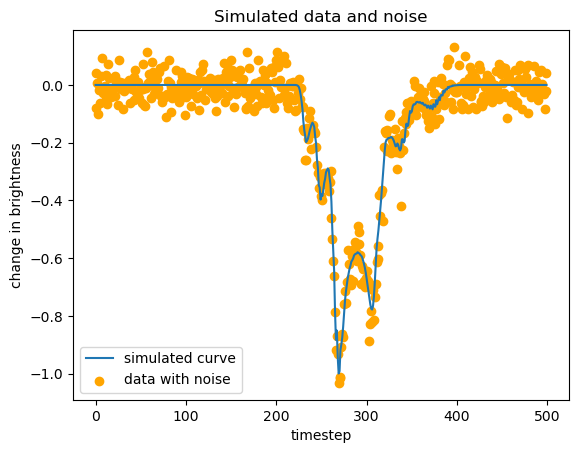

In [29]:
plt.plot(sim_data, label = 'simulated curve')
plt.scatter(np.arange(sim_data.size), noisy_sim_data, c='orange', label = 'data with noise')
plt.title('Simulated data and noise')
plt.xlabel('timestep')
plt.ylabel('change in brightness')
plt.legend();

In [30]:
found_coeff, residual, *trash = lstsq(sub_lcs, noisy_sim_data, rcond=None)

found_coeff.shape

(100,)

In [31]:
residual[0]

0.9221129032249418

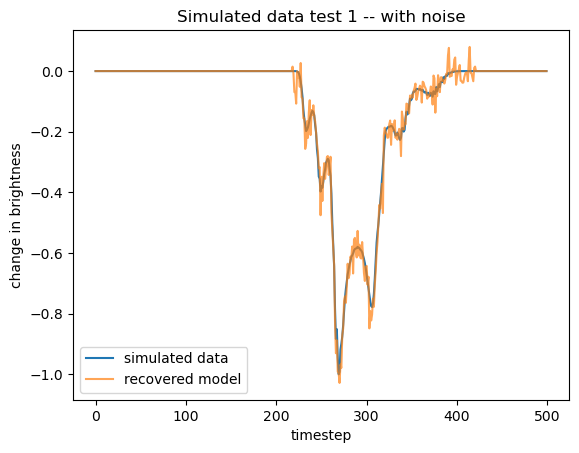

In [32]:
recovered_data = sub_lcs @ found_coeff

plt.plot(sim_data, label = 'simulated data')
plt.plot(np.reshape(recovered_data, (500)), label = 'recovered model', alpha = .7)
plt.title('Simulated data test 1 -- with noise')
plt.xlabel('timestep')
plt.ylabel('change in brightness')
plt.legend();

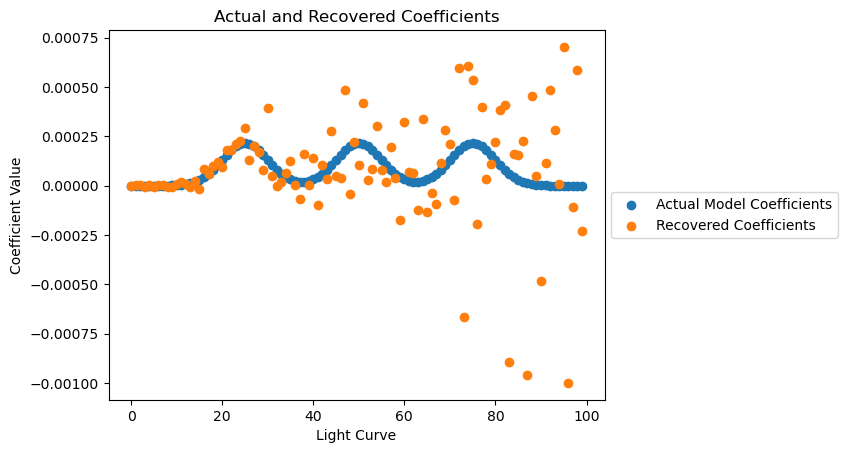

In [33]:
plt.scatter(model_nums, a_coeff, label = 'Actual Model Coefficients')
plt.scatter(model_nums, found_coeff, label = 'Recovered Coefficients')

plt.title('Actual and Recovered Coefficients')
plt.xlabel('Light Curve')
plt.ylabel('Coefficient Value')

# plt.ylim(-noise_lvl/10, noise_lvl/10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
avg_resid(found_coeff, a_coeff)

In [ ]:
np.count_nonzero(found_coeff)

## Random Coefficients Test

In [ ]:
model_nums = np.arange(100)

a_coeff = np.random.uniform(low=0, high=1, size=model_nums.size)

In [ ]:
plt.scatter(x, a_coeff)
plt.title('light curve number vs coefficent')
plt.xlabel('light curve')
plt.ylabel('coefficent');

In [ ]:
sim_data = sub_lcs @ a_coeff

#normalize
a_coeff = a_coeff/np.abs(sim_data).max()
sim_data = sub_lcs @ a_coeff

In [ ]:
#plt.plot(sim_data)

In [ ]:
noise = np.random.normal(scale=noise_lvl, size = sim_data.size)

noisy_sim_data = np.add(sim_data, noise)
noisy_sim_data.shape

In [ ]:
plt.plot(sim_data, label = 'simulated curve')
plt.scatter(np.arange(sim_data.size), noisy_sim_data, c ='orange', label = 'simulated data w/ noise')
plt.title('Simulated data and noise')
plt.xlabel('timestep')
plt.ylabel('change in brightness')
plt.legend();

In [ ]:
found_coeff, residual, *trash = lstsq(sub_lcs, noisy_sim_data, rcond=None)

found_coeff.shape

In [ ]:
residual[0]

In [ ]:
recovered_data = sub_lcs @ found_coeff

plt.plot(sim_data, label = 'simulated curve')
plt.plot(np.reshape(recovered_data, (500)), label = 'recovered model', alpha = .7)

plt.title('Simulated data test 1 -- with noise')
plt.xlabel('timestep')
plt.ylabel('change in brightness')

In [ ]:
plt.scatter(model_nums, a_coeff, label = 'Actual Model Coefficients')
plt.scatter(model_nums, found_coeff, label = 'Recovered Coefficients')

plt.title('Actual and Recovered Coefficients')
plt.xlabel('Light Curve')
plt.ylabel('Coefficient Value')

# plt.ylim(-noise_lvl,noise_lvl)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
avg_resid(found_coeff, a_coeff)

In [ ]:
np.count_nonzero(found_coeff)

# Trying to solve the negatives issue: scipy.optimize.nnls

The Non Negative Least Squares (nnls) function does apparently the same as the numpy function above, but making sure output is all positive. It does not, however, have an equivalent to the rcond value (but I think this is OK)

There is also a scipy function which allows us to more explicitly define bounds, but I don't think that'll be necessary

## patterned coefficients

#### Creating fake coefficients

3 gaussians centered at model 25, model 50, and model 75

In [72]:
width = 5
model_nums = np.arange(100)

a_coeff = np.zeros_like(model_nums)
a_coeff = a_coeff + gaussian(model_nums, 25, width) + gaussian(model_nums, 50, width) + gaussian(model_nums, 75, width)
a_coeff = a_coeff/(a_coeff.max())


#### Creating simulated data

In [77]:
sim_data = sub_lcs @ a_coeff

# normalize
# a_coeff = a_coeff/np.abs(sim_data).max()
# sim_data = sub_lcs @ a_coeff

sim_data.max()

# sim_data = np.concatenate((np.zeros(20), sim_data[:-20]))

# sim_data.size


1.0

#### Add noise

In [78]:
noise = np.random.normal(scale=.005, size = sim_data.size)

noisy_sim_data = np.add(sim_data, noise)
noisy_sim_data.shape

(500,)

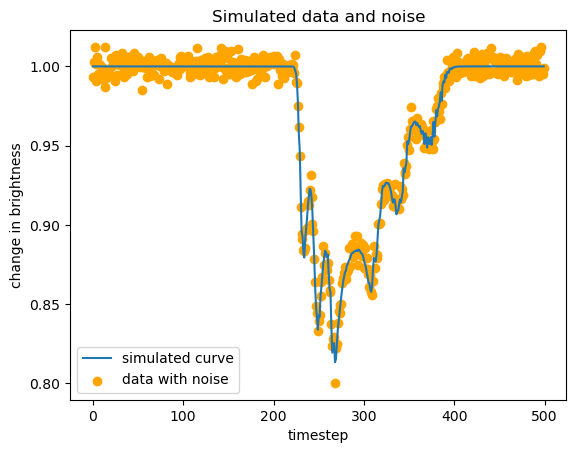

In [79]:
plt.plot(sim_data, label = 'simulated curve')
plt.scatter(np.arange(sim_data.size), noisy_sim_data, c='orange', label = 'data with noise')
plt.title('Simulated data and noise')
plt.xlabel('timestep')
plt.ylabel('change in brightness')
plt.legend();

In [80]:
found_coeff, residual = nnls(sub_lcs, noisy_sim_data)#output['x']

found_coeff.shape

(100,)

In [81]:
residual

0.09975464829074131

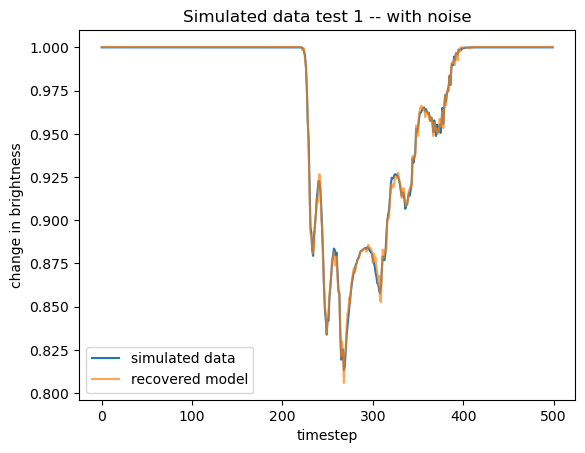

In [82]:
recovered_data = sub_lcs @ found_coeff

plt.plot(sim_data, label = 'simulated data')
plt.plot(np.reshape(recovered_data, (500)), label = 'recovered model', alpha = .7)
plt.title('Simulated data test 1 -- with noise')
plt.xlabel('timestep')
plt.ylabel('change in brightness')
plt.legend();

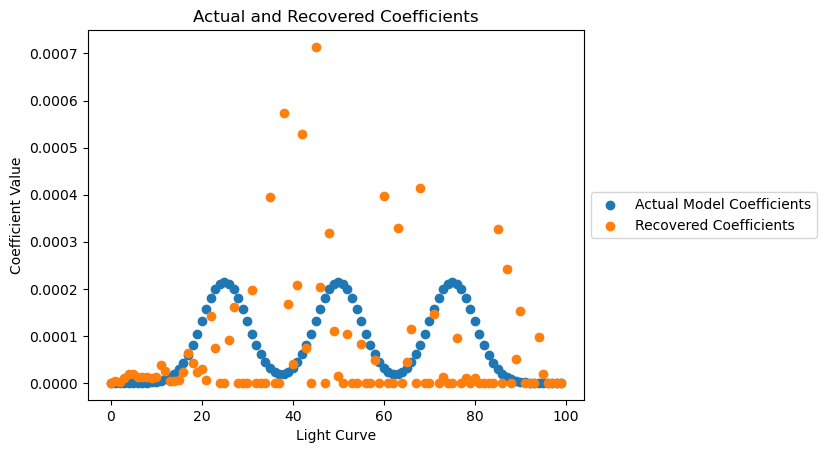

In [64]:
plt.scatter(model_nums, a_coeff, label = 'Actual Model Coefficients')
plt.scatter(model_nums, found_coeff, label = 'Recovered Coefficients')

plt.title('Actual and Recovered Coefficients')
plt.xlabel('Light Curve')
plt.ylabel('Coefficient Value')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [50]:
avg_resid(found_coeff, a_coeff)

8.827398312569338e-06

In [51]:
np.count_nonzero(found_coeff)

81

## random coefficients

#### Creating fake coefficients

3 gaussians centered at model 25, model 50, and model 75

In [ ]:
width = 5
model_nums = np.arange(100)

a_coeff = np.random.uniform(low=0, high=1, size=model_nums.size)

#### Creating simulated data

In [ ]:
sim_data = sub_lcs @ a_coeff

# normalize
a_coeff = a_coeff/np.abs(sim_data).max()
sim_data = sub_lcs @ a_coeff

#### Add noise

In [ ]:
noise = np.random.normal(scale=noise_lvl, size = sim_data.size)

noisy_sim_data = np.add(sim_data, noise)
noisy_sim_data.shape

In [ ]:
plt.plot(sim_data, label = 'simulated curve')
plt.scatter(np.arange(sim_data.size), noisy_sim_data, c='orange', label = 'data with noise')
plt.title('Simulated data and noise')
plt.xlabel('timestep')
plt.ylabel('change in brightness')
plt.legend();

In [ ]:
found_coeff, residual = nnls(sub_lcs, noisy_sim_data)#output['x']

found_coeff.shape

In [ ]:
residual

In [ ]:
recovered_data = sub_lcs @ found_coeff

plt.plot(sim_data, label = 'simulated data')
plt.plot(np.reshape(recovered_data, (500)), label = 'recovered model', alpha = .7)
plt.title('Simulated data test 1 -- with noise')
plt.xlabel('timestep')
plt.ylabel('change in brightness')
plt.legend();

In [ ]:
plt.scatter(model_nums, a_coeff, label = 'Actual Model Coefficients')
plt.scatter(model_nums, found_coeff, label = 'Recovered Coefficients')

plt.title('Actual and Recovered Coefficients')
plt.xlabel('Light Curve')
plt.ylabel('Coefficient Value')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
avg_resid(found_coeff, a_coeff)

In [ ]:
np.count_nonzero(found_coeff)